In [19]:
# Random Forest Regressor using clean data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [38]:
df = pd.read_csv('cleandata.csv')

# Define bins and labels with ranges attached
bins = [0, 11000, 44725, 95375, 182100, 231250, float('inf')]
labels = [
    'Low (0–11k)',
    'Lower Middle (11k–44.7k)',
    'Middle (44.7k–95.3k)',
    'Upper Middle (95.3k–182.1k)',
    'High (182.1k–231.2k)',
    'Very High (231.2k+)'
]

# Apply the cut
df['SalaryCategory'] = pd.cut(df['compUSD'], bins=bins, labels=labels)

# View counts per category
print(df['SalaryCategory'].value_counts())
print(df[['compUSD', 'SalaryCategory']].head())



SalaryCategory
Middle (44.7k–95.3k)           13316
Upper Middle (95.3k–182.1k)     7090
Lower Middle (11k–44.7k)        3401
High (182.1k–231.2k)            1023
Very High (231.2k+)             1006
Low (0–11k)                       82
Name: count, dtype: int64
   compUSD            SalaryCategory
0  55000.0      Middle (44.7k–95.3k)
1  78524.0      Middle (44.7k–95.3k)
2  34000.0  Lower Middle (11k–44.7k)
3  65000.0      Middle (44.7k–95.3k)
4  67000.0      Middle (44.7k–95.3k)


In [39]:
# Drop rows where salary category couldn't be assigned (NaN)
df = df.dropna(subset=['SalaryCategory'])

# Features and target
X = df.drop(columns=['compUSD', 'SalaryCategory'])
y = df['SalaryCategory']

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=16, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                             precision    recall  f1-score   support

       High (182.1k–231.2k)       0.74      0.49      0.59       176
                Low (0–11k)       0.00      0.00      0.00        13
   Lower Middle (11k–44.7k)       0.98      0.91      0.94       692
       Middle (44.7k–95.3k)       0.95      1.00      0.97      2714
Upper Middle (95.3k–182.1k)       0.92      0.96      0.94      1400
        Very High (231.2k+)       0.88      0.60      0.71       189

                   accuracy                           0.94      5184
                  macro avg       0.74      0.66      0.69      5184
               weighted avg       0.93      0.94      0.94      5184



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

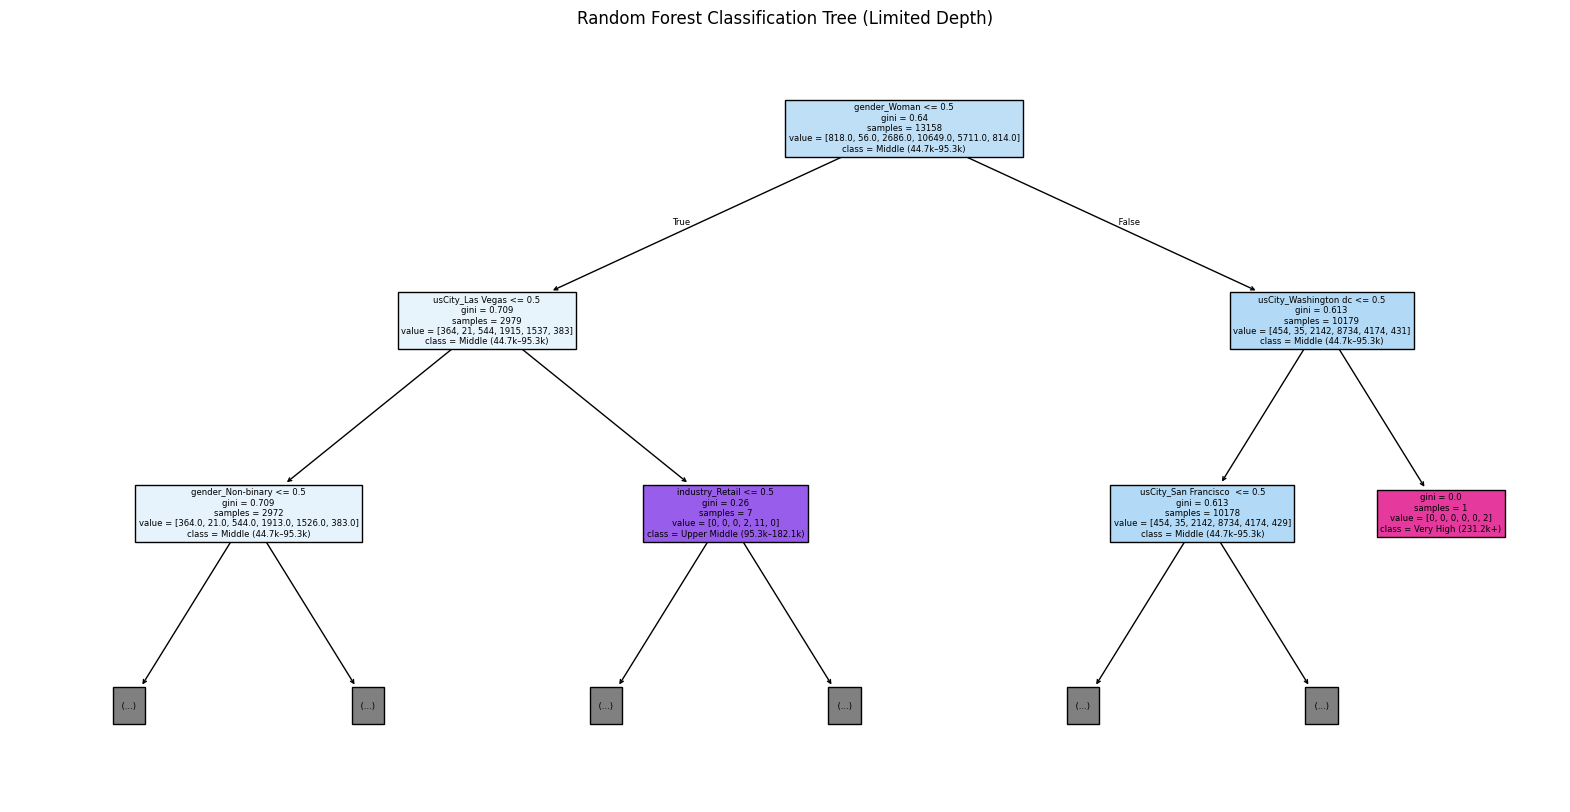

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=X.columns, class_names=clf.classes_, filled=True, max_depth=2)
plt.title("Random Forest Classification Tree (Limited Depth)")
plt.show()
